In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import os

In [2]:
os.listdir('./M2-project-2020/M2-project/diamonds.csv')

NotADirectoryError: [WinError 267] The directory name is invalid: './M2-project-2020/M2-project/diamonds.csv'

In [2]:
diamonds = pd.read_csv('./M2-project-2020/M2-project/diamonds.csv')

In [3]:

diamonds.reset_index(drop=True, inplace=True)

In [4]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
6,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
7,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
8,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
9,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [7]:
diamonds['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
diamonds['clarity_n'] = diamonds['clarity']

In [9]:
diamonds['clarity_n'] = diamonds['clarity'].replace({'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8})

In [10]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_n
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,7


In [20]:
diamo_price = diamonds[['price','carat']]

In [21]:
diamo_price.mean()

price    3934.409644
carat       0.797817
dtype: float64

In [22]:
diamo_price['carat'].unique()

array([0.21, 0.23, 0.29, 0.31, 0.24, 0.26, 0.3 , 0.22, 0.2 , 0.32, 0.33,
       0.25, 0.42, 0.28, 0.38, 0.86, 0.7 , 0.71, 0.78, 0.96, 0.73, 0.8 ,
       0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76, 0.64,
       0.79, 0.58, 1.17, 0.6 , 0.83, 0.72, 0.54, 0.98, 0.52, 1.01, 0.53,
       0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 0.93, 1.2 , 0.99,
       0.34, 0.35, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85, 0.92,
       1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 1.04, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.25, 1.07, 1.28, 1.51, 1.15, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.62, 1.57, 1.69, 2.06,
       1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 , 1.53, 1.85,
       2.01, 2.27, 1.68, 1.56, 1.81, 1.65, 1.82, 2.

In [23]:
diamo_price.head()

,price,carat
0,326,0.21
1,327,0.23
2,334,0.29
3,335,0.31
4,336,0.24


In [25]:
diamo_price.corr()

,price,carat
price,1.000000,0.922186
carat,0.922186,1.000000


In [26]:
model = LinearRegression()
X=diamonds[['carat']]
y=diamonds['price']


In [27]:
mod = model.fit(X,y)
print ('The slope is: ' , str(model.coef_[0]))
print ('The intercept is: ' , str(model.intercept_))

The slope is:  7759.352776440888
The intercept is:  -2256.131693074192


In [28]:
mod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

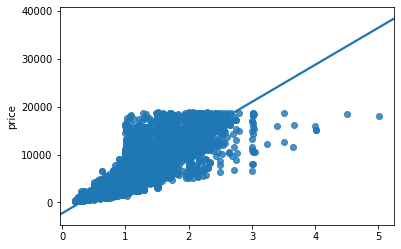

In [29]:
sns.regplot(X,y)

In [ ]:
sns.scatterplot(x="clarity_n", y="price", data=diamonds)

In [ ]:
sns.regplot(diamonds.clarity_n, diamonds.price)